در این مرحله با نگاهی کلی به دیتاست، وضعیت ویژگی‌ها و اهمیت و تاثیر آنها در یادگیری را بررسی می‌کنیم.

In [30]:
import seaborn as sns
import pandas as ps
import numpy as np


data = ps.read_csv("train_data.csv")

In [3]:
data.describe()

displayId     timestamp     dayOfWeek     hourOfDay  advertiserId  \
count  3.768416e+06  3.768416e+06  3.768416e+06  3.768416e+06  3.768416e+06   
mean   3.044210e+06  1.579005e+12  2.822654e+00  1.128271e+01  4.851426e+03   
std    1.019521e+06  3.571385e+08  1.914881e+00  5.618726e+00  2.899004e+03   
min    1.115095e+06  1.578429e+12  0.000000e+00  0.000000e+00  1.000000e+00   
25%    2.175378e+06  1.578715e+12  1.000000e+00  7.000000e+00  2.167000e+03   
50%    3.118769e+06  1.578971e+12  3.000000e+00  1.000000e+01  4.705000e+03   
75%    3.894130e+06  1.579330e+12  4.000000e+00  1.600000e+01  7.291000e+03   
max    4.706267e+06  1.579639e+12  6.000000e+00  2.300000e+01  1.074600e+04   

         campaignId    creativeId     publisher      widgetId        device  \
count  3.768416e+06  3.768416e+06  3.768416e+06  3.768416e+06  3.768416e+06   
mean   4.556158e+03  3.923456e+03  2.463082e+02  7.500866e+03  3.409207e-01   
std    2.647040e+03  2.482294e+03  5.164171e+02  4.301190e+03  4.817837e-01   
min    3.000000e+01  6.000000e+00  0.000000e+00  9.000000e+00  0.000000e+00   
25%    2.329000e+03  1.012000e+03  1.100000e+01  3.637000e+03  0.000000e+00   
50%    4.355000e+03  5.102000e+03  3.300000e+01  7.759000e+03  0.000000e+00   
75%    6.850000e+03  5.930000e+03  1.160000e+02  1.149700e+04  1.000000e+00   
max    9.523000e+03  7.268000e+03  2.551000e+03  1.436600e+04  3.000000e+00   

                 os       browser        source         docId        userId  \
count  3.768416e+06  3.768416e+06  3.768416e+06  3.768416e+06  3.768416e+06   
mean   4.306032e-01  1.209916e+00  1.848337e+03  5.065981e+06  1.501631e+06   
std    6.516009e-01  2.629931e+00  6.529483e+03  3.424284e+06  7.132266e+05   
min    0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  8.000000e+00   
25%    0.000000e+00  0.000000e+00  1.200000e+01  5.285000e+05  9.327162e+05   
50%    0.000000e+00  0.000000e+00  3.400000e+01  6.518645e+06  1.545785e+06   
75%    1.000000e+00  1.000000e+00  1.600000e+02  7.735219e+06  2.109148e+06   
max    6.000000e+00  1.020000e+02  4.037200e+04  9.692209e+06  2.688642e+06   

            clicked  
count  3.768416e+06  
mean   2.234841e-01  
std    4.165801e-01  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    0.000000e+00  
max    1.000000e+00

ماتریس کوریلیشن بین ویژگی‌ها بدین گونه است:

<AxesSubplot:>

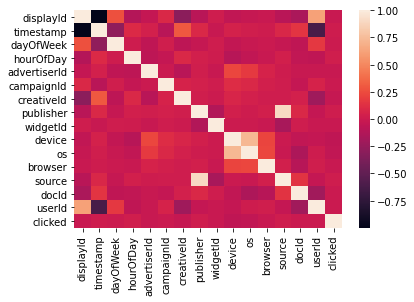

In [4]:
sns.heatmap(data.corr())

که در آن بین شناسه‌های کاربر، نمایش و زمان رابطه وجود دارد. البته که این رابطه کاذب است و به علت است که شناسه‌ها اعدادی صعودی اند و وا ورود کاربر در زمان‌های بعدی، شناسه‌های بزرگتری برای کاربر و نمایش به کاربر درنظر گرفته می‌شود.
&nbsp;

پس این روابط ارزشی در یادگیری ندارند.
همچنین بین پلتفرم و سیستم‌عامل هم رابطه وجود دارد که مربوط به حوزه مطلوب ما نیست و دلایل معلوم دیگری دارد.
منبع هم رابطه‌ای با منتشر کننده دارد که بنا به رابطه صفحات با سایت میزبان است و در صورتی که بخواهیم سایت‌ها را به تفکیک صفحات بررسی کنیم بدرد می‌خورد.

ویژگی شناسه کاربر را بررسی می‌کنیم:


(5.630821459309553, <AxesSubplot:xlabel='userId'>)

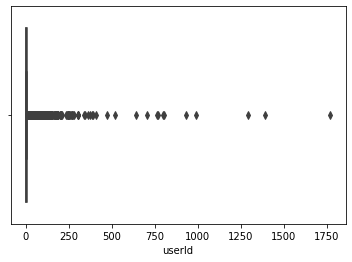

In [37]:
(np.mean(data.userId.value_counts()), sns.boxplot(data.userId.value_counts()))

می‌بینیم که از تعداد بسیار زیادی از کاربران داده‌های بسیار کمی دارم یعنی به‌طور کلی نمی‌توانیم
 .روی هر کابر تحلیل جداگانه بزنیم و احتمال مراجعه به تبلیغ را به طور جداگانه برای او پیدا کنیم. با توجه به رندم بودن این ویژگی، میتوانیم آن را کنار بگذاریم.
&nbsp;

  حال ویژگی زمانی را بررسی می‌کنیم. تعداد یکتای این ویژگی بسیار بالاست و از نظر منطقی این ویژگی کمکی در یادگیری نمی‌کند. (مانند ویژگی زمان)

<AxesSubplot:xlabel='timestamp', ylabel='Density'>

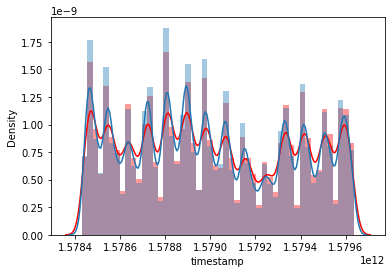

In [15]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.distplot(clicked.timestamp, color='red')
sns.distplot(unclicked.timestamp)

بنابر این تا اینجا ویژگی‌های زمان، شناسه‌ نمایش ، شناسه کاربر و سیستم‌عامل را کنار میگذاریم و استفاده ار ناشر بسته به انتخاب ما  است.
حال به سراغ ویژگی‌های زمان هفته و روز می‌رویم. نمودار تبلیغات کلیک شده و نشده برای هر ویژگی را رسم می‌کنیم:

<AxesSubplot:xlabel='hourOfDay', ylabel='Count'>

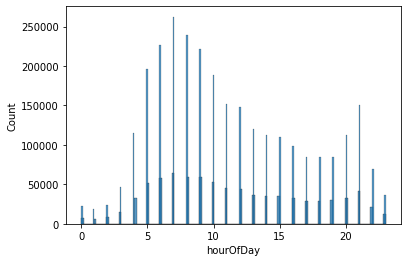

In [6]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.histplot(clicked.hourOfDay)
sns.histplot(unclicked.hourOfDay)

<AxesSubplot:xlabel='dayOfWeek', ylabel='Count'>

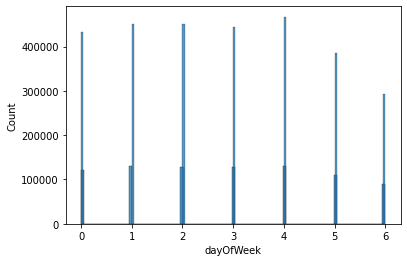

In [17]:
clicked = data[data.clicked==1]
unclicked = data[data.clicked==0]
sns.histplot(clicked.dayOfWeek)
sns.histplot(unclicked.dayOfWeek)

می‌بینیم که نسبت تبلیغات مراجعه شده و نشده در روز‌ها و ساعت مختلف برابر است. یعنی این ویژگی اگر به نتهایی و جدا از دیگر ویژگی‌ها (مانند شناسه کاربر و محتوای تبلیغ) بررسی شود، کمکی نخواهد کرد.
اما در روش ‌هایی که تاثیر مقادیر مختلف دو متغیر را در نظر می‌گیرد (مانند ماشین فکتوریزیشن) این ویژگی‌ها ممکن است به‌کار آید. زیرا ممکن است هر فرد در ساعات خاصی یا برای محتوا‌های خاصی بیشتر به تبلیغ‌مراجعه کند. (علایق و زمان‌های کاری افراد متفاوت است.)